In [1]:
import pyodbc as odbc
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DRIVER_NAME = 'ODBC Driver 17 for SQL Server'
SERVER_NAME = r'DESKTOP-L3GBMQ5\SQLEXPRESS'
DATABASE_NAME = 'Case_Studies'

connection_string = (
    f"DRIVER={{{DRIVER_NAME}}};"
    f"SERVER={SERVER_NAME};"
    f"DATABASE={DATABASE_NAME};"
    f"Trusted_Connection=yes;"
)

conn = odbc.connect(connection_string)
print("Connected successfully!")

Connected successfully!


In [8]:
sql_discount = """
WITH DiscountBuckets AS (
    SELECT 
        CASE 
            WHEN discount_percent < 0.1 THEN '0-10%'
            WHEN discount_percent >= 0.1 AND discount_percent < 0.2 THEN '10-20%'
            WHEN discount_percent >= 0.2 AND discount_percent < 0.3 THEN '20-30%'
            WHEN discount_percent >= 0.3 AND discount_percent < 0.4 THEN '30-40%'
            ELSE '40%+'
        END AS Discount_Range,
        SUM(total_sales) AS Total_Sales
    FROM retail_sales_cleaned_3
    GROUP BY 
        CASE 
            WHEN discount_percent < 0.1 THEN '0-10%'
            WHEN discount_percent >= 0.1 AND discount_percent < 0.2 THEN '10-20%'
            WHEN discount_percent >= 0.2 AND discount_percent < 0.3 THEN '20-30%'
            WHEN discount_percent >= 0.3 AND discount_percent < 0.4 THEN '30-40%'
            ELSE '40%+'
        END
)
SELECT * 
FROM DiscountBuckets
ORDER BY Discount_Range;
"""


In [9]:
df_discount = pd.read_sql(sql_discount, conn)
df_discount

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_12660\3904300538.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_discount = pd.read_sql(sql_discount, conn)


,Discount_Range,Total_Sales
0,0-10%,2.633220e+04
1,40%+,2.229106e+06


In [11]:
sql_trend = """
SELECT 
    order_year
    ,order_month
    ,SUM(total_sales) AS Total_Sales
FROM
    retail_sales_cleaned_3
GROUP BY
    order_year
    ,order_month
ORDER BY
    order_year
    ,order_month
"""

In [12]:
df_trend = pd.read_sql(sql_trend, conn)
df_trend

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_12660\3555986967.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(sql_trend, conn)


,order_year,order_month,Total_Sales
0,NaN,NaN,107341.000252
1,2024.0,1.0,114601.496590
2,2024.0,2.0,137709.428528
3,2024.0,3.0,120799.045000
4,2024.0,4.0,127834.157349
5,2024.0,5.0,130109.092163
6,2024.0,6.0,127870.706154
7,2024.0,7.0,98606.600525
8,2024.0,8.0,142156.405975
9,2024.0,9.0,116686.956749


In [16]:
# Compute Profit Margin at transaction-level first
df_trend['Total_Profit'] = df_trend['Total_Sales'] * 0.3
df_trend['Profit_margin'] = df_trend['Total_Profit'] / df_trend['Total_Sales']

In [25]:
df_trend["Profit_Margin"] = df_trend["Total_Profit"] / df_trend["Total_Sales"]

# Correlation across buckets
correlation = df_trend["Total_Sales"].corr(df_trend["Profit_Margin"])
print("Correlation across discount buckets:", correlation)



Correlation across discount buckets: nan


c:\Users\GIGABYTE\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


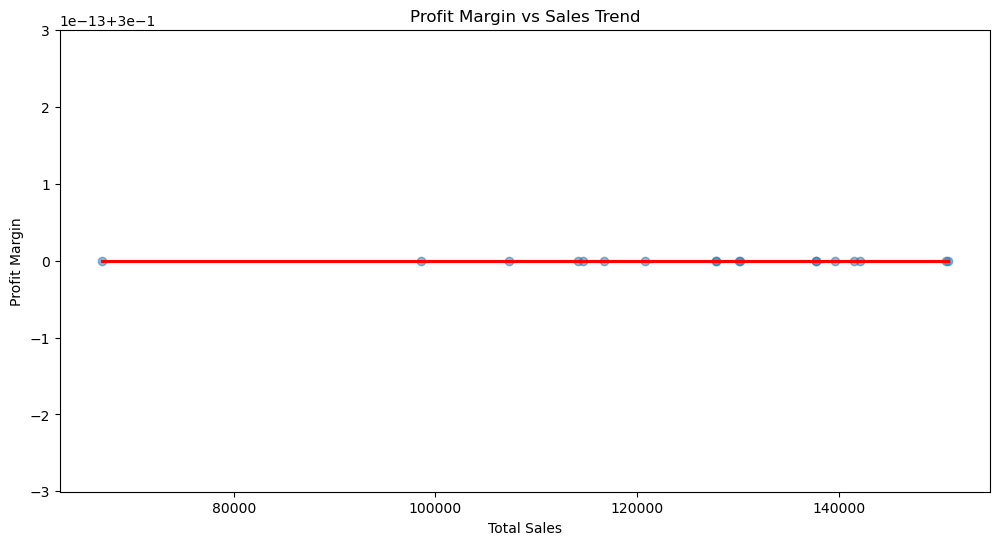

In [30]:
plt.figure(figsize=(12,6))
sns.regplot(
    x="Total_Sales",   
    y="Profit_Margin",
    data=df_trend,
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"}
)
plt.title("Profit Margin vs Sales Trend")
plt.xlabel("Total Sales")
plt.ylabel("Profit Margin")
plt.show()

In [29]:
print(df_trend.columns)


Index(['order_year', 'order_month', 'Total_Sales', 'Total_Profit',
       'Profit_margin', 'Profit_Margin'],
      dtype='object')


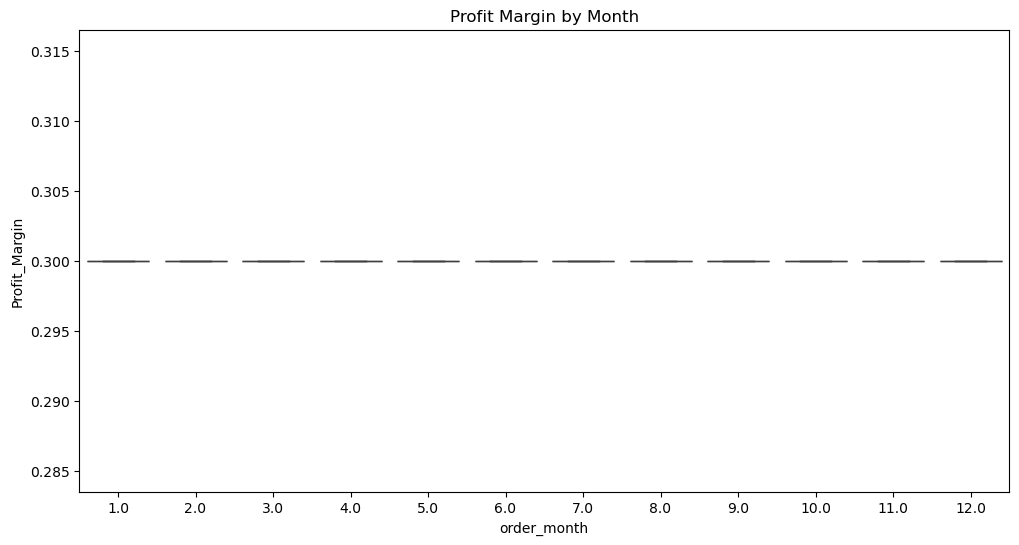

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="order_month", 
    y="Profit_Margin", 
    data=df_trend
)
plt.title("Profit Margin by Month")
plt.show()

